In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
## plotting libraries
from matplotlib import pyplot as plt

In [2]:
#read csv file
data = pd.read_csv("./Churn_Modelling.csv")

In [3]:
#display the features and their data types
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
#drop null values
data.dropna(inplace=True)

In [5]:
#check the count of our target variable
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
#check the count of the gender
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
#check the count of the various countries 
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
#getting dummies on categorical variables and dropping first
data = pd.get_dummies(data, columns=["Geography", "Gender"], prefix= "dmy",drop_first = True)

In [9]:
#set the index of the customer ID as index
#dropping the row number and surname as they have no influence on the model
data=data.set_index('CustomerId')
data = data.drop(["RowNumber", "Surname"], axis=1)

### X Y SPLIT

In [10]:
#y is the target variable 
y_col = "Exited"
y = data[y_col]

#Choosing all the features in the dataframe and dropping the target variable
X = data[data.columns.drop(y_col)]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
import pandas as pd
import numpy as np;
import scipy;
## stats Libraries
from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### SPLITTING TRAIN AND TEST SET

In [12]:
# Splitting the test and train set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=42)

### BALANCING DATA

In [13]:
#using the smote function to balance the data
smote = SMOTE()

In [14]:
#fit the smote function to our train set so we could balance the data
#this helps us avoid imbalanced data
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

### COLUMN TRANSFORMER

In [15]:
#display columns in our X train
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'dmy_Germany', 'dmy_Spain',
       'dmy_Male'],
      dtype='object')

In [16]:
# create a ColumnTransformer that applies a StandardScaler
#passing the only the values that we want to scale through the Column transformer object
#while the rest of the features pass through using the remainder variable
#the verbose features names out will prefix all feature names with the name of the transformer that generated that feature
#then we fit the scaled features in the X train
numeric_columns = ["Age", "EstimatedSalary", "Balance","CreditScore" , "Tenure","NumOfProducts"  ]
preprocessor = ColumnTransformer(transformers=[('standardize', StandardScaler(), numeric_columns)
], remainder="passthrough", verbose_feature_names_out=True, verbose=True).fit(X_train)

[ColumnTransformer] ... (1 of 2) Processing standardize, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [17]:
#transform the X train, this return a numpy arrary list X train
X_train_e = preprocessor.transform(X_train)

In [18]:
#the transformed data is put back into a dataframe, with column headers gotten using the preprocessor get features name
X_train_trans = pd.DataFrame(X_train_e,columns=preprocessor.get_feature_names_out())

In [19]:
#check the mean of our features
X_train_trans.mean()

standardize__Age               -8.052086e-16
standardize__EstimatedSalary   -1.739123e-16
standardize__Balance           -1.604876e-15
standardize__CreditScore       -1.794855e-16
standardize__Tenure             1.810226e-15
standardize__NumOfProducts     -3.234758e-14
remainder__HasCrCard            6.251573e-01
remainder__IsActiveMember       3.687067e-01
remainder__dmy_Germany          2.437854e-01
remainder__dmy_Spain            1.784141e-01
remainder__dmy_Male             4.145689e-01
dtype: float64

In [20]:
#transform our X test, 
#input the numpy array of the transformed test into a dataframe
X_test_e = preprocessor.transform(X_test)
X_test_trans = pd.DataFrame(X_test_e,columns=preprocessor.get_feature_names_out())

In [21]:
#display X test columns
#columns beginning with the prefix 'standardize', have been scaled 
#columns with remainder passed through and didnt get scaled
X_test_trans.columns

Index(['standardize__Age', 'standardize__EstimatedSalary',
       'standardize__Balance', 'standardize__CreditScore',
       'standardize__Tenure', 'standardize__NumOfProducts',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__dmy_Germany', 'remainder__dmy_Spain',
       'remainder__dmy_Male'],
      dtype='object')

### USING KNN CLASSIFIER

In [22]:
#create a KNN classifier
#number of neigbors is given as 2 while the weights is uniform
#this way all points in each neigborhood are weighted equally
knn = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform')

In [23]:
# train the classifier on the training set
knn.fit(X_train_trans, y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
# make predictions on the test set
y_pred_test = knn.predict(X_test_trans)

#make predictions on the train set
y_pred_train = knn.predict(X_train_trans)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy: 80.5


In [26]:
# Model Accuracy, how often is the classifier correct? on train set
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train)*100)

Accuracy: 93.2662051604783


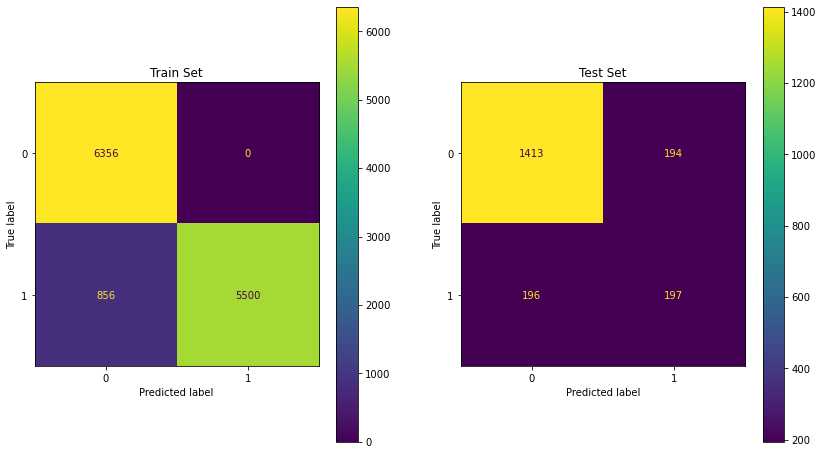

In [27]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

## calling the function
error_metrics_df,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred_test)
error_metrics_df


fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(knn,X_train_trans,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(knn,X_test_trans,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [28]:
# K loops for 21 times and displays result for each given neigbor their error metrics
full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_trans, y_train)

    models['k'] = [k, knn]

    y_pred_train_knn = knn.predict(X_train_trans)
    y_pred_test_knn  = knn.predict(X_test_trans)

    performance_knn, _, _ = evaluate_classification_model(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*3, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Accuracy,0.93,0.81
1,2,Precision,1.00,0.50
2,2,Recall,0.87,0.50
0,3,Accuracy,0.91,0.77
1,3,Precision,0.88,0.44
2,3,Recall,0.94,0.68
0,4,Accuracy,0.89,0.79
1,4,Precision,0.91,0.48
2,4,Recall,0.87,0.58
0,5,Accuracy,0.88,0.76


In [ ]:
# full.sort_values(['Train', 'Test'], ascending=False).groupby('Test').head()


### CROSS VALIDATION

In [29]:
#performing a cross val on my train set
#this technique can be used to choose the best value of k
scores=cross_val_score(knn, X_train_trans, y_train, cv=5)
scores

array([0.7683838 , 0.82383012, 0.85405193, 0.83005507, 0.8379229 ])

In [30]:
#print mean of the accuracy with its standard deviation 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.82 accuracy with a standard deviation of 0.03
